# Without sWeights: `common_B0TODst3pi_Dst_constr_BDT-1.25`

Check the $m(D^*)$ distribution after optimisation

In [1]:
data_name = 'common_B0TODst3pi_Dst_constr'
BDT_name = 'gradient'
data_name_MC = 'MC_constr_opposedCB_sharedMean'

BDT = -1.25

data_BDT_name = data_name + f'_BDT{BDT}'

In [2]:
branch_constr = 'Dst_constr_B0_M'
low = 5150.
high = 5545.

## Import

In [4]:
import zfit
import json
import numpy as np
import timeit

from numpy.random import normal

from math import sqrt

import zfit
import timeit
import pandas as pd
import numpy as np


from bd2dst3pi.locations import loc
from bd2dst3pi.definition import years, magnets, latex_params, latex_params_KPiPi
from bd2dst3pi.pandas_root import load_data, add_constr_Dst

import sys
sys.path.append(loc.ROOT + 'library/')

from HEA.plot import plot_hist_auto, plot_hist, plot_x_list_ys
from HEA.plot.fit import plot_hist_fit_auto
from HEA.fit import json_to_latex_table, retrieve_params, show_latex_table, get_params_without_BDT
from HEA.fit.fit import define_zparams, sum_crystalball_or_gaussian
from HEA.tools import show_dictionnary
import HEA.plot.tools as pt
from HEA.pandas_root import load_saved_root

## Load

In [5]:
df= {}

In [6]:
df['common'] = load_saved_root('common_'+BDT_name, folder_name='common', vars=['B0_M', 'Dst_M', 'BDT'])
df['common_opt'] = df['common'].query(f"BDT > {BDT}")

Loading /afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_gradient.root


In [7]:
df['MC'] = load_data(years, magnets, 'MC', vars = ['B0_M', 'Dst_M'])
df['MC'] = add_constr_Dst(df['MC'])

Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root


## PLOT

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODst3pi_Dst_constr_BDT-1.25/Dst_M_LHCb_data_LHCb_data_with_BDT>-1.25


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Candidates / (0.848 MeV/$c^2$)'>)

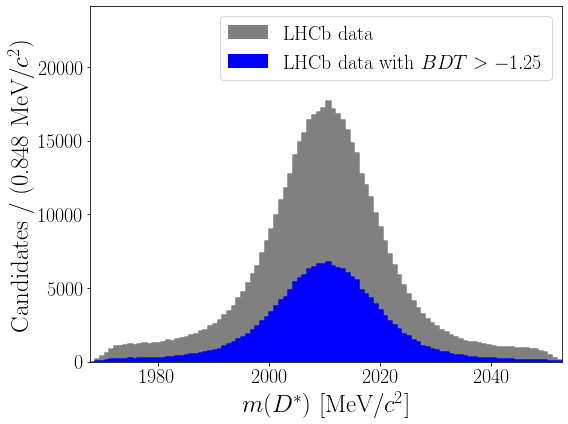

In [8]:
plot_hist_auto({'LHCb data': df['common'], 'LHCb data with $BDT>-1.25$': df['common_opt']}, 'Dst_M', 
                     bar_mode=True, colors=['grey', 'blue'], density=False, alpha=1,
                     folder_name=data_BDT_name)

Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODst3pi_Dst_constr_BDT-1.25/Dst_M_MC


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Candidates / (0.811 MeV/$c^2$)'>)

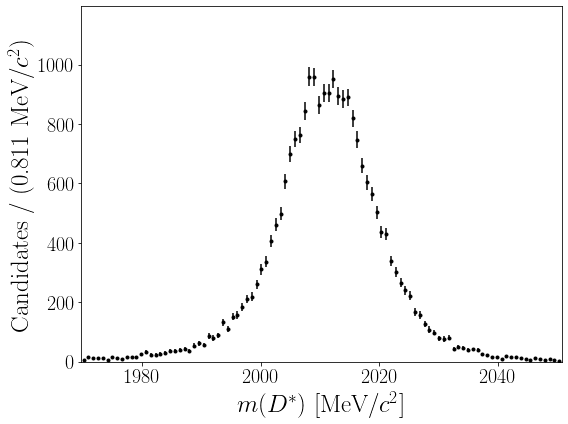

In [9]:
plot_hist_auto({'MC': df['MC']}, 'Dst_M', 
                     bar_mode=False, colors='black',
                     folder_name=data_BDT_name)

Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODst3pi_Dst_constr_BDT-1.25/Dst_M_LHCb_data_with_BDT>-1.25_MC


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Proportion of candidates / (0.848 MeV/$c^2$)'>)

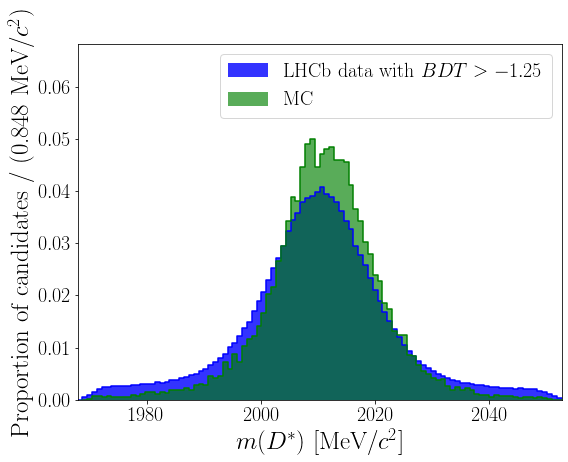

In [10]:
plot_hist_auto({'LHCb data with $BDT>-1.25$': df['common'], 'MC': df['MC']}, 'Dst_M', 
                     bar_mode=True, colors=['blue', 'green'],
                     folder_name=data_BDT_name, alpha=[0.8,0.65])